<a href="https://colab.research.google.com/github/affu-11/News-Topic-Clustering/blob/main/Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title**

News Topic Clustering using Unsupervised Machine Learning

**Domain**

Natural Language Processing (NLP), Media & Journalism

1. The project belongs to the text mining & NLP domain, where the main goal is to extract hidden structures or groupings from large amounts of unlabelled news data.

2. This helps news agencies, content platforms, and aggregators to organize articles automatically into categories such as politics, sports, entertainment, business, and technology.

**Data Type**

Unstructured Text Data

Dataset contains news headlines or full articles.

Example format:

id	      headline

1    	"Government announces new policy for rural development"

2   	"Champions League final ends with dramatic penalty shootout"

3	    "Tech giants release AI-powered personal assistants"

**ML Techniques**

Text Preprocessing → Cleaning and normalizing text data.

Feature Extraction → Converting text into numerical representation using TF-IDF Vectorization.

Dimensionality Reduction → Using PCA (Principal Component Analysis) or t-SNE for visualization.

Clustering Algorithms → Primarily K-Means, optionally Hierarchical Clustering.

Evaluation → Using Silhouette Score & Davies-Bouldin Index to check cluster quality.

**Preprocessing Required**

Lowercasing (convert text to lowercase).

Remove punctuation, numbers & special characters.

Tokenization (split text into words).

Stopword Removal (remove common words like the, is, and).

Lemmatization (reduce words to root form → running → run).

TF-IDF Vectorization to represent text in numerical form.

**Dimensionality Reduction**

PCA (Principal Component Analysis): Reduce high-dimensional TF-IDF vectors into a smaller number of features while retaining most of the variance.

t-SNE (t-distributed Stochastic Neighbor Embedding): For better visualization in 2D/3D, especially to show distinct clusters of topics.

**Clustering Method**

K-Means Clustering (main approach)

Groups news headlines into k clusters.

Number of clusters (k) chosen using Elbow Method or Silhouette Score.

Hierarchical Clustering (optional)

Useful for creating a tree/dendrogram of topics.

**Evaluation Metrics**

Silhouette Score → Measures how well samples are clustered.

Davies–Bouldin Index (DBI) → Lower values indicate better clusters.

Visual Validation → Scatterplots of clusters in 2D/3D.

**Final Output**

Clustered Groups of News Articles

Example:

Cluster 0 → Politics/Government news

Cluster 1 → Sports news

Cluster 2 → Technology news

Cluster 3 → Entertainment/Movies

Cluster 4 → Business/Finance

Interactive 2D/3D visualization of clusters using Plotly.

Representative headlines per cluster to show interpretability.

**Tools & Libraries**

**Programming Language:** Python

**Data Handling:** pandas, numpy

**Text Preprocessing:** nltk, spacy, re

**Feature Extraction:** scikit-learn (TfidfVectorizer)

**Dimensionality Reduction:** scikit-learn (PCA), sklearn.manifold (t-SNE)

**Clustering:** scikit-learn (KMeans, AgglomerativeClustering)

**Visualization:** matplotlib, seaborn, plotly



**Business Applications**

Automatic categorization of online news articles.

Personalized news feeds for users.

Content-based recommendation systems.

Detecting trending topics in media.

# **Import Libraries**

In [8]:
# Step 0: Install correct versions (NO Chrome needed)
!pip install -q plotly==5.24.1 kaleido==0.2.1 nltk scikit-learn pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.7 MB/s eta 0:00:00


In [31]:
# Step 1: imports and small setup
import pandas as pd
import numpy as np
import re
import nltk
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# NLTK (download once)
nltk.download("stopwords", quiet=True)
nltk.download("wordnet", quiet=True)
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

sns.set(style="whitegrid")
RANDOM_STATE = 42

In [17]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Datasets/bbc-text.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (2225, 2)


category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...

In [19]:
# Step 3: simple cleaning (tokenize, remove stopwords, lemmatize)
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"[^a-z\s]", " ", text)        # keep letters + spaces
    tokens = [w for w in text.split() if w not in stop_words and len(w) > 2]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return " ".join(tokens)

df["clean_text"] = df["text"].apply(clean_text)
df[["category","clean_text"]].head()


category                                         clean_text
0           tech  future hand viewer home theatre system plasma ...
1       business  worldcom bos left book alone former worldcom b...
2          sport  tiger wary farrell gamble leicester say rushed...
3          sport  yeading face newcastle cup premiership side ne...
4  entertainment  ocean twelve raid box office ocean twelve crim...

In [13]:
# Step 4: TF-IDF (convert text to numbers)
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["clean_text"]).toarray()
print("TF-IDF shape:", X.shape)


TF-IDF shape: (2225, 5000)


In [20]:
# Step 5: Elbow method to help choose k
Ks = list(range(2, 10))
inertias = []
for k in Ks:
    km = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    km.fit(X)
    inertias.append(km.inertia_)

# Interactive Plotly (useful in Colab)
fig = px.line(x=Ks, y=inertias, markers=True,
              title="Elbow: k (clusters) vs Inertia (WCSS)",
              labels={"x":"k","y":"Inertia"})
fig.show()

# Save static PNG (so GitHub displays it)
plt.figure(figsize=(7,4))
plt.plot(Ks, inertias, marker="o")
plt.xlabel("k (clusters)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method")
plt.xticks(Ks)
plt.tight_layout()
plt.savefig("elbow_plot.png", dpi=150)
plt.close()
print("Saved: elbow_plot.png")


Saved: elbow_plot.png


In [28]:
K_CHOSEN = 5  # from elbow
kmeans = KMeans(n_clusters=K_CHOSEN, random_state=RANDOM_STATE, n_init=10)
labels = kmeans.fit_predict(X)
df["cluster"] = labels

sil = silhouette_score(X, labels)
dbi = davies_bouldin_score(X, labels)
print(f"Silhouette={sil:.4f}, Davies-Bouldin={dbi:.4f}")

# Cluster sizes
counts = df["cluster"].value_counts().sort_index()
fig = px.bar(x=counts.index.astype(str), y=counts.values,
             title="Cluster Sizes", labels={"x":"cluster","y":"count"})
fig.show()

plt.figure(figsize=(6,4))
sns.barplot(x=counts.index.astype(str), y=counts.values,
            hue=counts.index.astype(str), palette="Set2", dodge=False, legend=False)
plt.xlabel("cluster"); plt.ylabel("count"); plt.title("Cluster Sizes")
plt.tight_layout()
plt.savefig("cluster_sizes.png", dpi=150)
plt.close()

Silhouette=0.0175, Davies-Bouldin=7.3181


Saved: cluster_sizes.png


In [24]:
# Step 7: PCA -> t-SNE for visualization
pca = PCA(n_components=50, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X)

tsne = TSNE(n_components=2, random_state=RANDOM_STATE, perplexity=30, max_iter=500)
X_tsne = tsne.fit_transform(X_pca)

df["tsne1"] = X_tsne[:,0]
df["tsne2"] = X_tsne[:,1]

# Interactive Plotly
fig = px.scatter(df, x="tsne1", y="tsne2", color=df["cluster"].astype(str),
                 hover_data={"category":True, "clean_text":False},
                 title="t-SNE projection (clusters)")
fig.update_traces(marker=dict(size=6))
fig.show()

# Static PNG for GitHub
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["tsne1"], y=df["tsne2"], hue=df["cluster"].astype(str),
                palette="Set2", s=40, linewidth=0)
plt.title("t-SNE projection (clusters)")
plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")
plt.legend(title="cluster", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.savefig("tsne_clusters.png", dpi=150)
plt.close()
print("Saved: tsne_clusters.png")


Saved: tsne_clusters.png


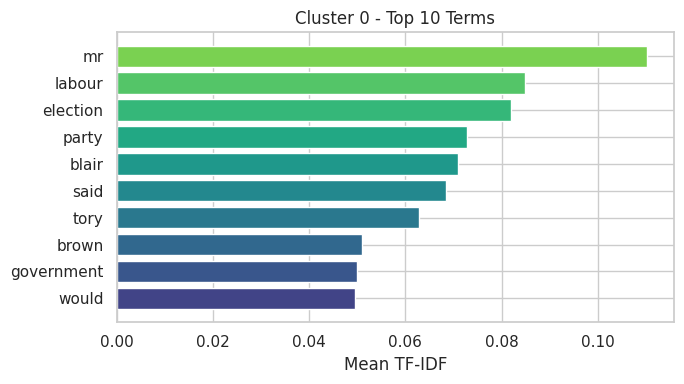

Saved: cluster_0_top_terms.png


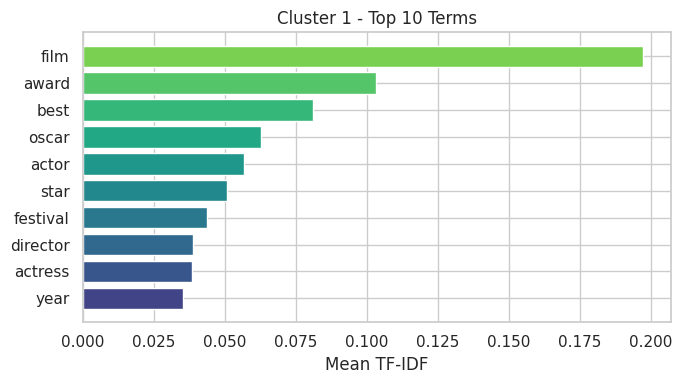

Saved: cluster_1_top_terms.png


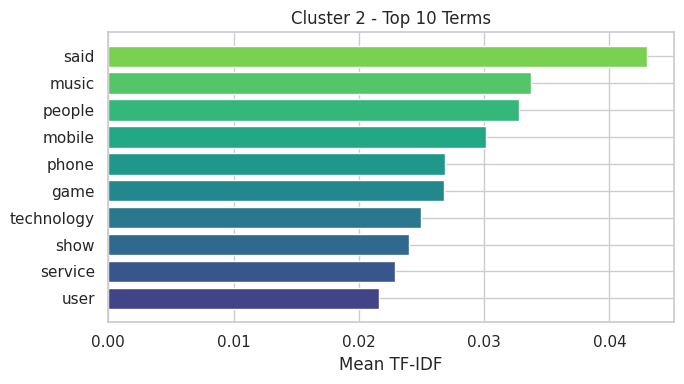

Saved: cluster_2_top_terms.png


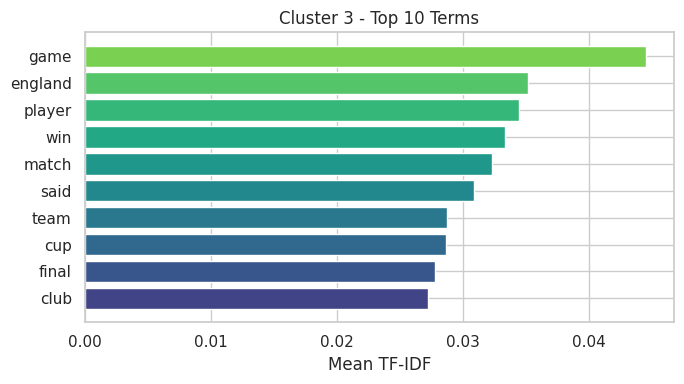

Saved: cluster_3_top_terms.png


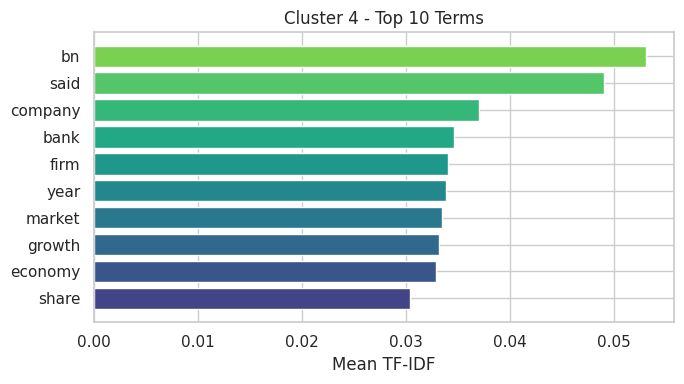

Saved: cluster_4_top_terms.png


In [35]:
# Step 8: Top terms per cluster (Plotly interactive + matplotlib PNG)
assert "cluster" in df.columns, "Run clustering step first (df['cluster'] missing)."
terms = vectorizer.get_feature_names_out()
X_df = pd.DataFrame(X, columns=terms)
X_df["cluster"] = df["cluster"]

top_n = 10
cluster_top_terms = {}

for c in sorted(df["cluster"].unique()):
    mean_vals = X_df[X_df["cluster"]==c].drop(columns="cluster").mean()
    top_terms = mean_vals.sort_values(ascending=False).head(top_n)
    cluster_top_terms[c] = top_terms

    # --- Plotly interactive horizontal bar ---
    # reverse so largest appears at top
    y_terms = top_terms.index[::-1]
    x_vals = top_terms.values[::-1]
    fig = px.bar(x=x_vals, y=y_terms, orientation='h',
                 labels={'x':'Mean TF-IDF', 'y':'Term'},
                 title=f"Cluster {c} Top {top_n} Terms (interactive)")
    fig.update_layout(height=400, margin=dict(l=150))
    fig.show()
    plt.figure(figsize=(7,4))
    plt.barh(y_terms, x_vals, color=plt.cm.viridis(np.linspace(0.2,0.8,len(x_vals))))
    plt.xlabel("Mean TF-IDF")
    plt.title(f"Cluster {c} - Top {top_n} Terms")
    plt.tight_layout()
    fname = f"cluster_{c}_top_terms.png"
    plt.savefig(fname, dpi=150)
    plt.show()
    plt.close()
    print("Saved:", fname)


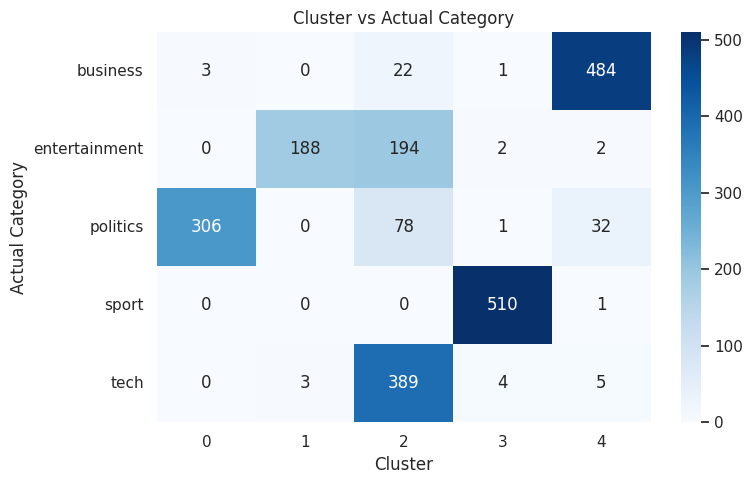

Saved: cluster_category_heatmap.png


In [36]:
# Step 9: Cluster vs Actual Category heatmap (interactive + static)
cross_tab = pd.crosstab(df["category"], df["cluster"])

# Plotly interactive heatmap
fig = px.imshow(cross_tab.values,
                x=cross_tab.columns.astype(str),
                y=cross_tab.index,
                color_continuous_scale="Blues",
                labels=dict(x="Cluster", y="Category", color="Count"),
                text_auto=True,
                title="Cluster vs Actual Category (interactive)")
fig.update_xaxes(side="top")
fig.show()

# Static PNG using seaborn
plt.figure(figsize=(8,5))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="Blues")
plt.title("Cluster vs Actual Category")
plt.xlabel("Cluster")
plt.ylabel("Actual Category")
plt.tight_layout()
plt.savefig("cluster_category_heatmap.png", dpi=150)
plt.show()
plt.close()
print("Saved: cluster_category_heatmap.png")


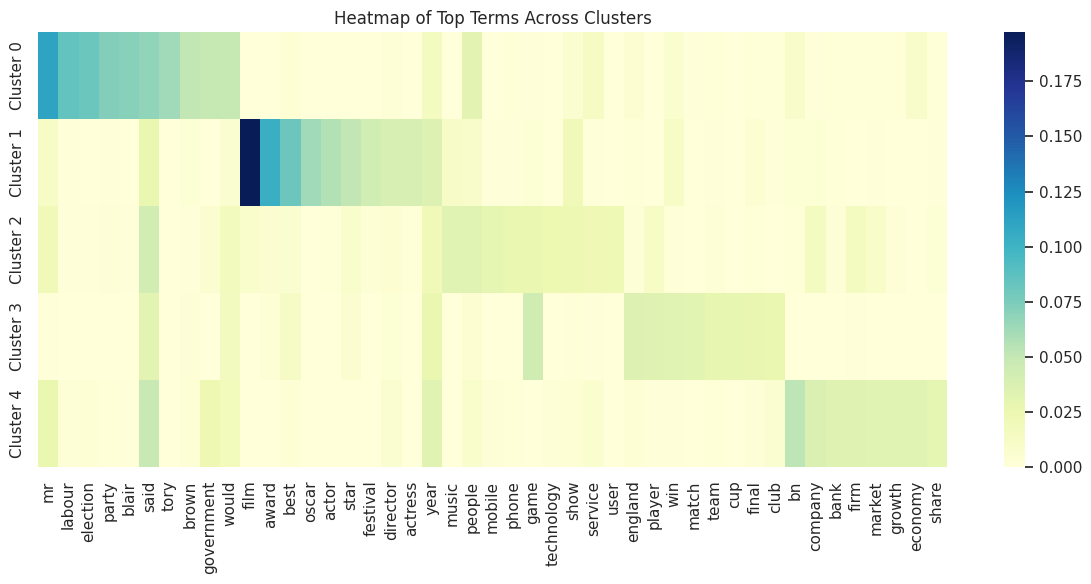

Saved: top_terms_heatmap.png


In [37]:
# Step 10: Heatmap of top terms across clusters (interactive + static)
# Build list of unique top terms across clusters
top_terms_all = []
for c in cluster_top_terms:
    top_terms_all.extend(cluster_top_terms[c].index.tolist())
top_terms_unique = list(dict.fromkeys(top_terms_all))  # keep order, make unique

# Build matrix: rows = clusters, cols = terms
heatmap_data = []
for c in sorted(df["cluster"].unique()):
    mean_vals = X_df[X_df["cluster"]==c][top_terms_unique].mean().values
    heatmap_data.append(mean_vals)

heatmap_df = pd.DataFrame(np.array(heatmap_data),
                          index=[f"Cluster {c}" for c in sorted(df["cluster"].unique())],
                          columns=top_terms_unique)

# Plotly interactive heatmap
fig = px.imshow(heatmap_df.values,
                x=heatmap_df.columns,
                y=heatmap_df.index,
                color_continuous_scale="YlGnBu",
                labels=dict(x="Term", y="Cluster", color="Mean TF-IDF"),
                title="Top Terms Heatmap (interactive)")
fig.update_layout(xaxis_tickangle=-45, height=450)
fig.show()

# Static PNG via seaborn
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_df, cmap="YlGnBu")
plt.title("Heatmap of Top Terms Across Clusters")
plt.tight_layout()
plt.savefig("top_terms_heatmap.png", dpi=150)
plt.show()
plt.close()
print("Saved: top_terms_heatmap.png")


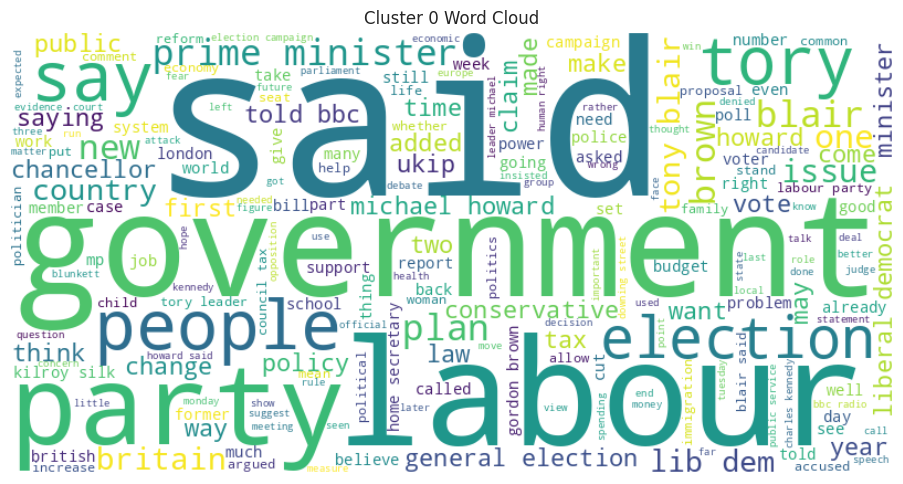

Saved: cluster_0_wordcloud.png


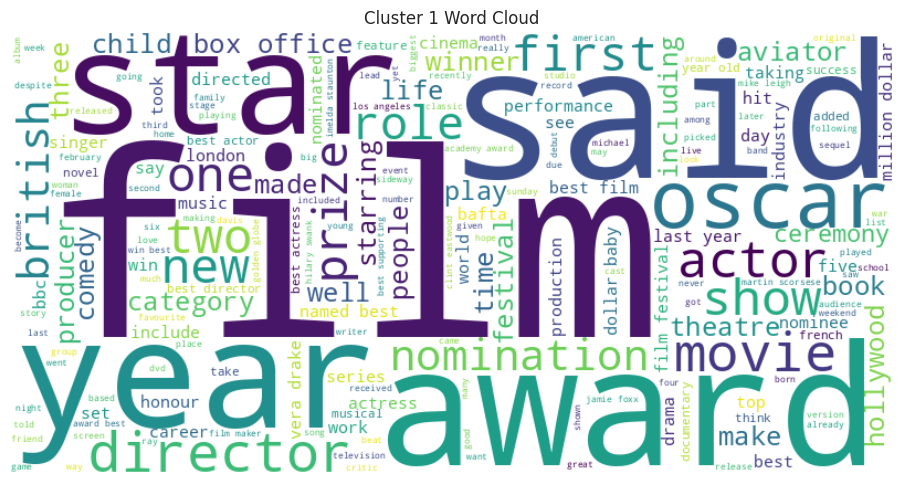

Saved: cluster_1_wordcloud.png


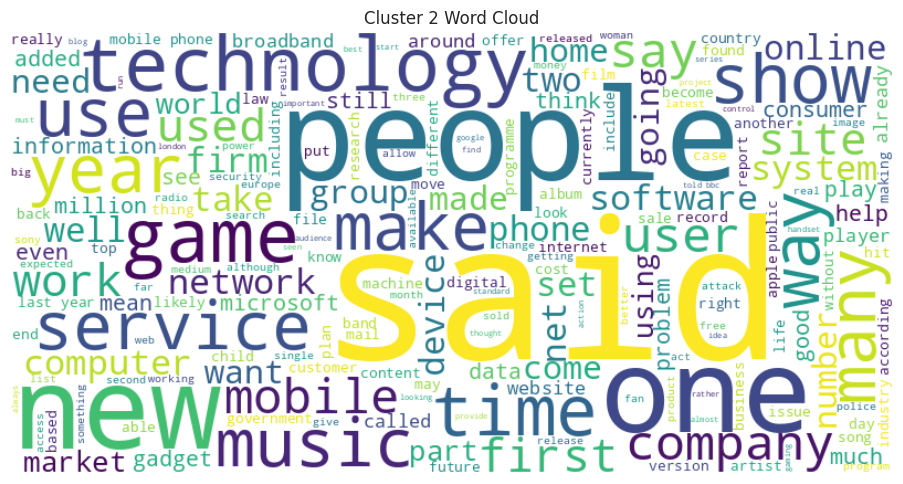

Saved: cluster_2_wordcloud.png


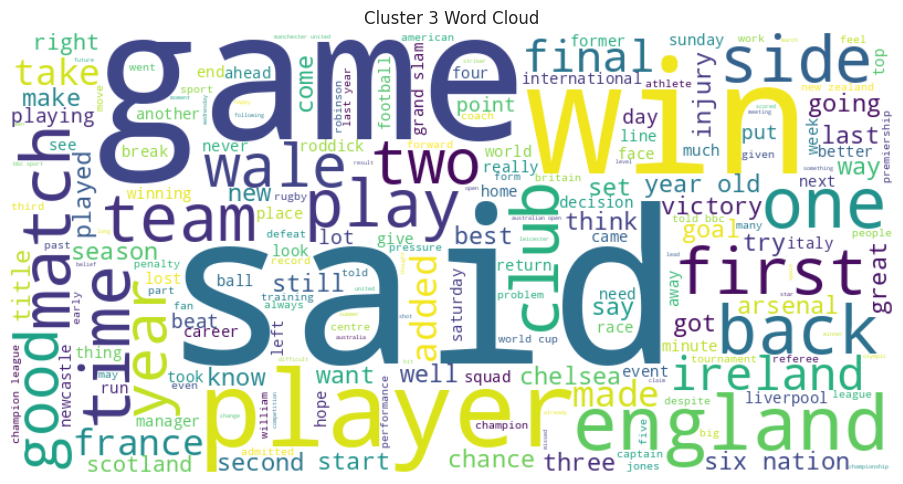

Saved: cluster_3_wordcloud.png


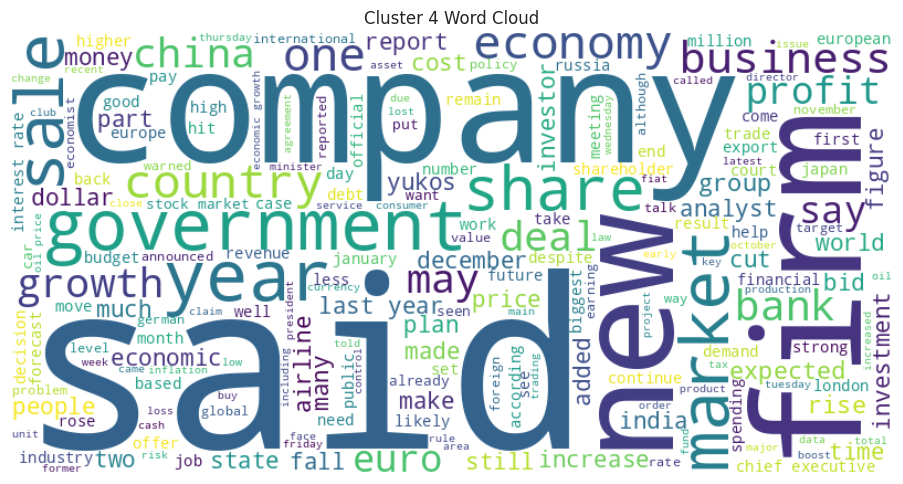

Saved: cluster_4_wordcloud.png


In [38]:
# Step 11: Word clouds (visual summary) - show + save
from wordcloud import STOPWORDS

for c in sorted(df["cluster"].unique()):
    text = " ".join(df[df["cluster"]==c]["clean_text"].values)
    if len(text.strip()) == 0:
        print(f"Cluster {c} has no text.")
        continue

    wc = WordCloud(width=800, height=400, background_color="white",
                   stopwords=STOPWORDS, colormap="viridis").generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Cluster {c} Word Cloud")
    plt.tight_layout()
    fname = f"cluster_{c}_wordcloud.png"
    plt.savefig(fname, dpi=150)
    plt.show()
    plt.close()
    print("Saved:", fname)


In [39]:
# Step 12: Save results for GitHub/report
df_out = df.copy()
cols_to_save = ["category", "cluster", "tsne1", "tsne2", "text"]
df_out.to_csv("bbc_clusters_output_with_tsne.csv", index=False)
print("Saved:", "bbc_clusters_output_with_tsne.csv")


Saved: bbc_clusters_output_with_tsne.csv
